In [1]:
import numpy as np
import tensorflow as tf
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import os
import datetime
import pandas as pd

from keras.regularizers import l2
print(tf.__version__)

Using TensorFlow backend.


2.1.0


In [2]:
# load (downloaded if needed) the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [4]:
print("Train_images:", train_images.shape)
print("Number of Train labels", len(train_labels))
print("Train_labels:", train_labels)
print("test_images:", test_images.shape)
print("Number of test labels", len(test_labels))

Train_images: (60000, 28, 28)
Number of Train labels 60000
Train_labels: [5 0 4 ... 5 6 8]
test_images: (10000, 28, 28)
Number of test labels 10000


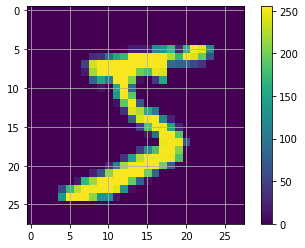

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

In [6]:
train_images = train_images/255.0
test_images = test_images/255.0

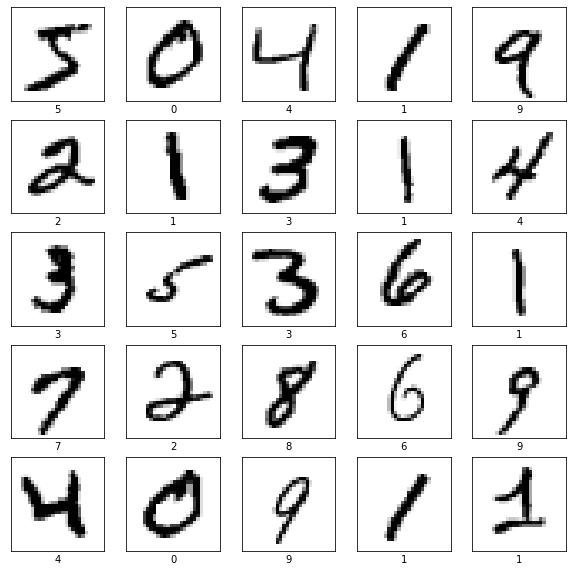

In [7]:
plt.figure(figsize=(10, 10))
for i in range (25):
  plt.subplot(5, 5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model = Sequential()
model.add(layers.Dense(128, input_shape=(28, 28), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(64, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01), activation='relu'))
model.add(layers.Dense(10))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 28, 128)           3712      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3584)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                229440    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 233,802
Trainable params: 233,802
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [12]:
history = model.fit(train_images, 
                    train_labels,
                    epochs=20,
                    validation_data = (test_images, test_labels),
                    callbacks=[tensorboard_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 240us/sample - loss: 0.6770 - accuracy: 0.8960 - val_loss: 0.4829 - val_accuracy: 0.9274
Epoch 2/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.4707 - accuracy: 0.9236 - val_loss: 0.4185 - val_accuracy: 0.9373
Epoch 3/20
60000/60000 [==============================] - 13s 219us/sample - loss: 0.4096 - accuracy: 0.9356 - val_loss: 0.3751 - val_accuracy: 0.9457
Epoch 4/20
60000/60000 [==============================] - 13s 212us/sample - loss: 0.3746 - accuracy: 0.9420 - val_loss: 0.3333 - val_accuracy: 0.9516
Epoch 5/20
60000/60000 [==============================] - 12s 200us/sample - loss: 0.3516 - accuracy: 0.9451 - val_loss: 0.3492 - val_accuracy: 0.9415
Epoch 6/20
60000/60000 [==============================] - 12s 196us/sample - loss: 0.3319 - accuracy: 0.9474 - val_loss: 0.3233 - val_accuracy: 0.9511
Epoch 7/20
60000/60000 [====================

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2, callbacks=[tensorboard_callback])
print("\nTest accuracy", test_acc)

10000/10000 - 1s - loss: 0.2317 - accuracy: 0.9674

Test accuracy 0.9674


10000/10000 - 1s - loss: 0.2317 - accuracy: 0.9674


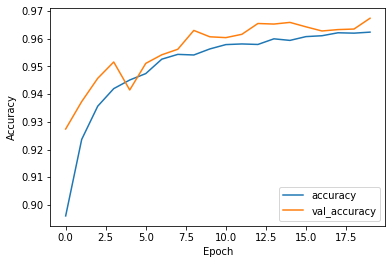

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(test_labels[0])

[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7


In [16]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predictions = probability_model.predict(test_images)
  print(predictions[0])
  print(np.argmax(predictions[0]))
  print(test_labels[0])
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7


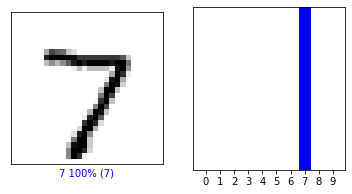

In [17]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7


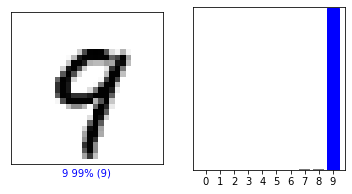

In [18]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.9505735e-06 1.0350869e-05]
7
7
[2.2530105e-06 3.2095218e-07 5.5530771e-05 8.7100540e-05 3.0544993e-09
 3.1034340e-06 2.5062543e-09 9.9983335e-01 7.95

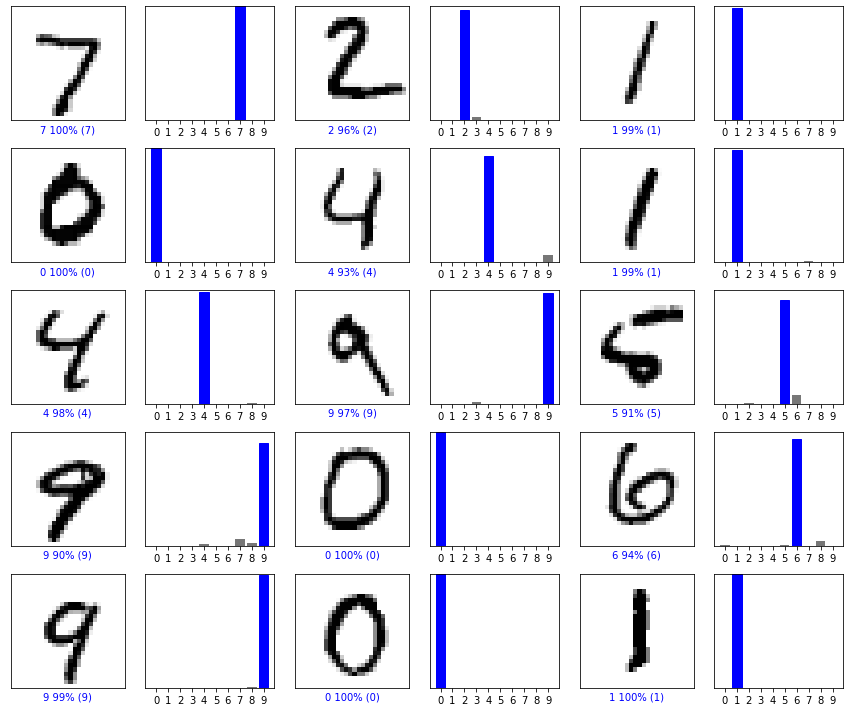

In [19]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [20]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [21]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [22]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.8338162e-04 1.8293991e-03 9.6427256e-01 3.3238772e-02 5.4442171e-09
  1.3353213e-05 7.3874056e-05 1.4134079e-08 8.8555156e-05 4.5504997e-08]]


In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])